In [1]:
import iris
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import iris.plot as iplt
import iris.quickplot as qplt
import zipfile
from six.moves import urllib
from glob import glob
%matplotlib inline
import cartopy.crs as ccrs
import cmaps
import netCDF4 as nc 
import tobac
import warnings
import xarray as xr
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)
warnings.filterwarnings('ignore',category=pd.io.pytables.PerformanceWarning)

In [2]:
def transforming_nc(datafile):
    file = nc.Dataset(datafile)
    Tb = np.array(file['irad'])
    co = np.array(file['tmptab'])
    IR = co[Tb]
    ds = xr.open_dataset(datafile)
    ir = xr.DataArray(IR,dims=["lat", "lon"])
    ds['Tb'] = ir
    var = list(ds.keys())
    var.remove('Tb')
    var.remove('time')
    ds = ds.drop(labels=var)
    ds = ds.set_coords('time')
    return ds

In [3]:
# Get the list of all files and directories
path = "C:/Users/Julia/Documents/_NASA/DATA/"
dir_list = os.listdir(path)

In [4]:
file_list = []
for i in dir_list:
    i = 'DATA/' + i
    file_list.append(i)

In [5]:
'''datafiles = ['DATA/ISCCP.HXG.v01r00.GLOBAL.1983.07.01.0000.GPC.10KM.CS0000100031.EQ0.10.nc',
            'DATA/ISCCP.HXG.v01r00.GLOBAL.1983.07.01.0300.GPC.10KM.CS0000100031.EQ0.10.nc',
            'DATA/ISCCP.HXG.v01r00.GLOBAL.1983.07.01.0600.GPC.10KM.CS0000100031.EQ0.10.nc',
            'DATA/ISCCP.HXG.v01r00.GLOBAL.1983.07.01.0900.GPC.10KM.CS0000100031.EQ0.10.nc',
            'DATA/ISCCP.HXG.v01r00.GLOBAL.1983.07.01.1200.GPC.10KM.CS0000100031.EQ0.10.nc',
            'DATA/ISCCP.HXG.v01r00.GLOBAL.1983.07.01.1500.GPC.10KM.CS0000100031.EQ0.10.nc',
            'DATA/ISCCP.HXG.v01r00.GLOBAL.1983.07.01.1800.GPC.10KM.CS0000100031.EQ0.10.nc',
            'DATA/ISCCP.HXG.v01r00.GLOBAL.1983.07.01.2100.GPC.10KM.CS0000100031.EQ0.10.nc']'''

"datafiles = ['DATA/ISCCP.HXG.v01r00.GLOBAL.1983.07.01.0000.GPC.10KM.CS0000100031.EQ0.10.nc',\n            'DATA/ISCCP.HXG.v01r00.GLOBAL.1983.07.01.0300.GPC.10KM.CS0000100031.EQ0.10.nc',\n            'DATA/ISCCP.HXG.v01r00.GLOBAL.1983.07.01.0600.GPC.10KM.CS0000100031.EQ0.10.nc',\n            'DATA/ISCCP.HXG.v01r00.GLOBAL.1983.07.01.0900.GPC.10KM.CS0000100031.EQ0.10.nc',\n            'DATA/ISCCP.HXG.v01r00.GLOBAL.1983.07.01.1200.GPC.10KM.CS0000100031.EQ0.10.nc',\n            'DATA/ISCCP.HXG.v01r00.GLOBAL.1983.07.01.1500.GPC.10KM.CS0000100031.EQ0.10.nc',\n            'DATA/ISCCP.HXG.v01r00.GLOBAL.1983.07.01.1800.GPC.10KM.CS0000100031.EQ0.10.nc',\n            'DATA/ISCCP.HXG.v01r00.GLOBAL.1983.07.01.2100.GPC.10KM.CS0000100031.EQ0.10.nc']"

In [6]:
list_of_ds = []
for f in file_list:
    x = transforming_nc(f)
    list_of_ds.append(x)

In [7]:
xx = xr.concat(list_of_ds,dim="time")

In [8]:
xxx = xx.transpose("time", "lat", "lon")

In [9]:
def transforming_f(file):
    min_lat = -30
    max_lat = 30
    mask_lat = (file.lat >= min_lat) & (file.lat <= max_lat)
    cropped_ds = file.where(mask_lat, drop=True)
    cropped_ds.time.attrs['axis'] = 'T'
    cropped_ds.time.attrs['standard_name'] = 'time'
    del cropped_ds.time.attrs['long_name']
    cropped_ds.lon.attrs['axis'] = 'X'
    cropped_ds.lon.attrs['units'] = 'degrees_east'
    cropped_ds.lon.attrs['standard_name'] = 'longitude'
    cropped_ds.lon.attrs['spacing'] = '0.1'
    cropped_ds.lat.attrs['axis'] = 'Y'
    cropped_ds.lat.attrs['units'] = 'degrees_north'
    cropped_ds.lat.attrs['standard_name'] = 'latitude'
    cropped_ds.lat.attrs['spacing'] = '0.1'
    cropped_ds.Tb.attrs['long_name'] = 'Tb'
    cropped_ds.Tb.attrs['units'] = 'K'
    TB = cropped_ds.Tb.to_iris()
    return TB

In [10]:
TB = transforming_f(xx)

In [11]:
xr.open_dataset('DATA/ISCCP.HXG.v01r00.GLOBAL.1983.07.01.0000.GPC.10KM.CS0000100031.EQ0.10.nc')

<xarray.Dataset>
Dimensions:         (lon: 3600, edge: 2, lat: 1800, count: 256)
Coordinates:
  * lon             (lon) float32 0.05 0.15 0.25 0.35 ... 359.8 359.9 360.0
  * lat             (lat) float32 -89.95 -89.85 -89.75 ... 89.75 89.85 89.95
Dimensions without coordinates: edge, count
Data variables: (12/35)
    lon_bounds      (lon, edge) float32 ...
    lat_bounds      (lat, edge) float32 ...
    tmptab          (count) float32 ...
    pretab          (count) float32 ...
    rfltab          (count) float32 ...
    tautab          (count) float32 ...
    ...              ...
    vtmpic          (lat, lon) float32 ...
    vprsic          (lat, lon) float32 ...
    icslog          (lat, lon) uint8 ...
    vcslog          (lat, lon) uint8 ...
    irret           (lat, lon) uint8 ...
    vsret           (lat, lon) uint8 ...
Attributes: (12/65)
    Conventions:                              CF-1.6, ACDD-1.3
    title:                                    International Satellite Cloud C...
    summary:                                  The HXG product represents glob...
    keywords:                                 EARTH SCIENCE > ATMOSPHERE > CL...
    keywords_vocabulary:                      NASA Global Change Master Direc...
    platform_vocabulary:                      NASA Global Change Master Direc...
    ...                                       ...
    isccp_percent_full_cells:                 88
    isccp_percent_empty_cells:                12
    product_version:                          v01r00,
    id:                                       ISCCP.HXG.v01r00.GLOBAL.1983.07...
    isccp_input_files:                        gms/dx/ISCCP.HXS.v01r00.GMS2.19...
    history:                                  Tue Jul 11 23:45:04 2017: ncatt...

In [12]:
ds = xr.open_dataset('test5.nc')

In [13]:
ds

<xarray.Dataset>
Dimensions:  (time: 5, lat: 101, lon: 82)
Coordinates:
  * lat      (lat) float64 0.0 0.05 0.1 0.15 0.2 0.25 ... 4.8 4.85 4.9 4.95 5.0
  * lon      (lon) float64 52.0 52.0 52.1 52.15 52.2 ... 55.9 55.95 56.0 56.0
  * time     (time) datetime64[ns] 2020-07-01 ... 2020-07-01T02:00:00
Data variables:
    Tb       (time, lat, lon) float64 ...

In [14]:
xx

<xarray.Dataset>
Dimensions:  (lon: 3600, lat: 1800, time: 56)
Coordinates:
  * lon      (lon) float32 0.05 0.15 0.25 0.35 0.45 ... 359.7 359.8 359.9 360.0
  * lat      (lat) float32 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * time     (time) datetime64[ns] 1983-07-01 ... 1983-07-07T21:00:00
Data variables:
    Tb       (time, lat, lon) float32 211.5 211.5 211.5 ... -1e+03 -1e+03 -1e+03
Attributes: (12/65)
    Conventions:                              CF-1.6, ACDD-1.3
    title:                                    International Satellite Cloud C...
    summary:                                  The HXG product represents glob...
    keywords:                                 EARTH SCIENCE > ATMOSPHERE > CL...
    keywords_vocabulary:                      NASA Global Change Master Direc...
    platform_vocabulary:                      NASA Global Change Master Direc...
    ...                                       ...
    isccp_percent_full_cells:                 88
    isccp_percent_empty_cells:                12
    product_version:                          v01r00,
    id:                                       ISCCP.HXG.v01r00.GLOBAL.1983.07...
    isccp_input_files:                        gms/dx/ISCCP.HXS.v01r00.GMS2.19...
    history:                                  Tue Jul 11 23:45:04 2017: ncatt...

In [15]:
TB

Tb (K),time,latitude,longitude
Shape,56,600,3600
Dimension coordinates,,,
time,x,-,-
latitude,-,x,-
longitude,-,-,x


In [16]:
#Set up directory to save output and plots:
savedir='Save'
if not os.path.exists(savedir):
    os.makedirs(savedir)
plot_dir="Plot"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

In [17]:
dxy,dt=tobac.get_spacings(TB,grid_spacing=10000) #grid_spacing = 10000 m?

In [18]:
dt #seconds

10800

In [19]:
dxy #meters?

10000

In [20]:
import inspect
lines = inspect.getsource(tobac.get_spacings)
print(lines)

def get_spacings(field_in, grid_spacing=None, time_spacing=None):
    import numpy as np
    from copy import deepcopy

    # set horizontal grid spacing of input data
    # If cartesian x and y corrdinates are present, use these to determine dxy (vertical grid spacing used to transfer pixel distances to real distances):
    coord_names = [coord.name() for coord in field_in.coords()]

    if (
        "projection_x_coordinate" in coord_names
        and "projection_y_coordinate" in coord_names
    ) and (grid_spacing is None):
        x_coord = deepcopy(field_in.coord("projection_x_coordinate"))
        x_coord.convert_units("metre")
        dx = np.diff(field_in.coord("projection_y_coordinate")[0:2].points)[0]
        y_coord = deepcopy(field_in.coord("projection_y_coordinate"))
        y_coord.convert_units("metre")
        dy = np.diff(field_in.coord("projection_y_coordinate")[0:2].points)[0]
        dxy = 0.5 * (dx + dy)
    elif grid_spacing is not None:
        dxy = grid_spacing

In [21]:
# Keyword arguments for the feature detection step
parameters_features=dict()
parameters_features['position_threshold']='weighted_diff'
parameters_features['sigma_threshold']=1.5
parameters_features['n_erosion_threshold']=2

parameters_features['min_num']=5
parameters_features['target']='minimum'
# parameters_features['threshold']=[230, 220, 210, 200]
parameters_features['threshold']=[250, 240, 230]
# parameters_features['threshold']=[230, 220, 210]

In [22]:
# Feature detection and save results to file:
print('starting feature detection')
Features=tobac.feature_detection_multithreshold(TB,dxy,**parameters_features)
Features.to_hdf(os.path.join(savedir,'Features.h5'),'table')
print('feature detection performed and saved')

starting feature detection
feature detection performed and saved


In [23]:
print(tobac.feature_detection_multithreshold.__doc__)

Function to perform feature detection based on contiguous regions above/below a threshold
    Input:
    field_in:      iris.cube.Cube
                   2D field to perform the tracking on (needs to have coordinate 'time' along one of its dimensions)

    thresholds:    list of floats
                   threshold values used to select target regions to track
    dxy:           float
                   grid spacing of the input data (m)
    target:        str ('minimum' or 'maximum')
                   flag to determine if tracking is targetting minima or maxima in the data
    position_threshold: str('extreme', 'weighted_diff', 'weighted_abs' or 'center')
                      flag choosing method used for the position of the tracked feature
    sigma_threshold: float
                     standard deviation for intial filtering step
    n_erosion_threshold: int
                         number of pixel by which to erode the identified features
    n_min_threshold: int
                 

In [24]:
# ** collects all the keyword arguments in a dictionary.
lines = inspect.getsource(tobac.feature_detection_multithreshold)
print(lines)

def feature_detection_multithreshold(
    field_in,
    dxy,
    threshold=None,
    min_num=0,
    target="maximum",
    position_threshold="center",
    sigma_threshold=0.5,
    n_erosion_threshold=0,
    n_min_threshold=0,
    min_distance=0,
    feature_number_start=1,
):
    """Function to perform feature detection based on contiguous regions above/below a threshold
    Input:
    field_in:      iris.cube.Cube
                   2D field to perform the tracking on (needs to have coordinate 'time' along one of its dimensions)

    thresholds:    list of floats
                   threshold values used to select target regions to track
    dxy:           float
                   grid spacing of the input data (m)
    target:        str ('minimum' or 'maximum')
                   flag to determine if tracking is targetting minima or maxima in the data
    position_threshold: str('extreme', 'weighted_diff', 'weighted_abs' or 'center')
                      flag choosing method used for

In [25]:
Features
# Frame: the index along the time dimension in which the feature was detected
# hdim_1, hdim_2…: the central index location of the feature in the spatial dimensions of the input data
# num: the number of connected pixels that meet the threshold for detection for this feature
#threshold_value: the threshold value that was used to detect this feature.When using feature_detection_multithreshold 
# this is the max/min (depending on whether the threshold values are increasing (e.g. precip) or decreasing (e.g. temperature) with intensity) threshold value used.
# Cell: The cell which each feature belongs to. Is nan if the feature could not be linked into a valid trajectory
# time_cell: The time of the feature along the tracked cell, in numpy.timedelta64[ns] format

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,latitude,longitude
0,0,1,0.000000,289.087293,3,250,1,1983-07-01 00:00:00,1983-07-01 00:00:00,-29.950001,28.958730
1,0,3,1.438269,1134.305823,12,250,2,1983-07-01 00:00:00,1983-07-01 00:00:00,-29.806172,113.480581
2,0,4,2.134571,1837.525053,24,250,3,1983-07-01 00:00:00,1983-07-01 00:00:00,-29.736543,183.802508
3,0,6,0.258672,2106.000000,2,250,4,1983-07-01 00:00:00,1983-07-01 00:00:00,-29.924133,210.650009
4,0,11,0.935445,3055.300018,12,250,5,1983-07-01 00:00:00,1983-07-01 00:00:00,-29.856454,305.580001
...,...,...,...,...,...,...,...,...,...,...,...
39041,55,1244,577.000000,975.000000,1,230,39042,1983-07-07 21:00:00,1983-07-07 21:00:00,27.750004,97.550003
39042,55,1245,579.123113,1105.428428,3,230,39043,1983-07-07 21:00:00,1983-07-07 21:00:00,27.962312,110.592842
39043,55,1246,585.007046,1166.484488,7,230,39044,1983-07-07 21:00:00,1983-07-07 21:00:00,28.550704,116.698446
39044,55,1247,596.659174,2788.092167,113,230,39045,1983-07-07 21:00:00,1983-07-07 21:00:00,29.715919,278.859251


In [26]:
# Keyword arguments for the segmentation step:
parameters_segmentation={}
# parameters_segmentation['target']='minimum'
parameters_segmentation['method']='watershed'
parameters_segmentation['threshold']=250
# parameters_segmentation['threshold']=230
# parameters_segmentation['threshold']=220

In [27]:
# Perform segmentation and save results to files:
# Perform segmentation and save results to files:
Mask_TB,Features_TB=tobac.segmentation_2D(Features,TB,dxy,**parameters_segmentation)
print('segmentation TB performed, start saving results to files')
iris.save([Mask_TB],os.path.join(savedir,'Mask_Segmentation_TB.nc'),zlib=True,complevel=4)                
Features_TB.to_hdf(os.path.join(savedir,'Features_TB.h5'),'table')
print('segmentation TB performed and saved')

segmentation TB performed, start saving results to files
segmentation TB performed and saved


In [28]:
lines = inspect.getsource(tobac.segmentation)
print(lines)

import logging


def segmentation_3D(
    features,
    field,
    dxy,
    threshold=3e-3,
    target="maximum",
    level=None,
    method="watershed",
    max_distance=None,
):
    return segmentation(
        features,
        field,
        dxy,
        threshold=threshold,
        target=target,
        level=level,
        method=method,
        max_distance=max_distance,
    )


def segmentation_2D(
    features,
    field,
    dxy,
    threshold=3e-3,
    target="maximum",
    level=None,
    method="watershed",
    max_distance=None,
):
    return segmentation(
        features,
        field,
        dxy,
        threshold=threshold,
        target=target,
        level=level,
        method=method,
        max_distance=max_distance,
    )


def segmentation_timestep(
    field_in,
    features_in,
    dxy,
    threshold=3e-3,
    target="maximum",
    level=None,
    method="watershed",
    max_distance=None,
    vertical_coord="auto",
):
    """
    Function performing wat

In [29]:
lines = inspect.getsource(tobac.segmentation_2D)
print(lines)

def segmentation_2D(
    features,
    field,
    dxy,
    threshold=3e-3,
    target="maximum",
    level=None,
    method="watershed",
    max_distance=None,
):
    return segmentation(
        features,
        field,
        dxy,
        threshold=threshold,
        target=target,
        level=level,
        method=method,
        max_distance=max_distance,
    )



In [30]:
# timestr: the date and time of the feature in string format

In [31]:
Features_TB[Features_TB['num'] == 3]

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,latitude,longitude,ncells
0,0,1,0.000000,289.087293,3,250,1,1983-07-01 00:00:00,1983-07-01 00:00:00,-29.950001,28.958730,3
14,0,25,13.054665,3228.489505,3,250,15,1983-07-01 00:00:00,1983-07-01 00:00:00,-28.644535,322.898975,3
30,0,42,58.600496,2943.600496,3,250,31,1983-07-01 00:00:00,1983-07-01 00:00:00,-24.089949,294.410072,3
31,0,43,58.000000,3458.703909,3,250,32,1983-07-01 00:00:00,1983-07-01 00:00:00,-24.149998,345.920410,3
38,0,56,106.186156,2836.338259,3,250,39,1983-07-01 00:00:00,1983-07-01 00:00:00,-19.331386,283.683842,3
...,...,...,...,...,...,...,...,...,...,...,...,...
38935,55,1138,389.245854,370.240504,3,230,38936,1983-07-07 21:00:00,1983-07-07 21:00:00,8.974587,37.074050,7
38977,55,1180,432.048192,2079.048192,3,230,38978,1983-07-07 21:00:00,1983-07-07 21:00:00,13.254824,207.954831,7
39023,55,1226,552.000000,982.271518,3,230,39024,1983-07-07 21:00:00,1983-07-07 21:00:00,25.250004,98.277153,7
39036,55,1239,572.679699,2803.067798,3,230,39037,1983-07-07 21:00:00,1983-07-07 21:00:00,27.317973,280.356815,7


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

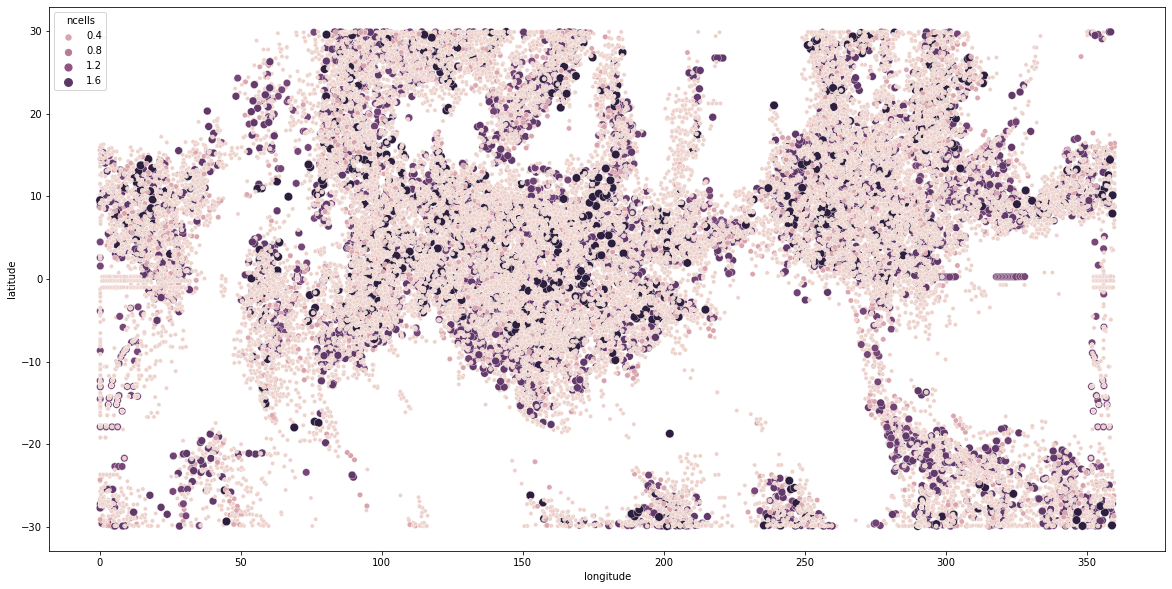

In [33]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.scatterplot(x='longitude',y='latitude',data=Features_TB,size='ncells',hue='ncells')

In [34]:
Features_TB.num.max()

461472

In [35]:
f = Features_TB[Features_TB['num'] <=10]

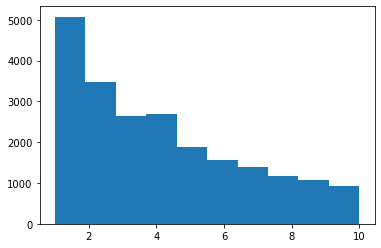

In [36]:
plt.hist(f['num']);

In [37]:
# # keyword arguments for linking step
# parameters_linking={}
# parameters_linking['v_max']=20
# parameters_linking['stubs']=2
# parameters_linking['order']=1
# parameters_linking['extrapolate']=1
# parameters_linking['memory']=0
# parameters_linking['adaptive_stop']=0.2
# parameters_linking['adaptive_step']=0.95
# parameters_linking['subnetwork_size']=100
# parameters_linking['method_linking']= 'predict'

# Keyword arguments for linking step:
parameters_linking={}
parameters_linking['method_linking']='predict'
parameters_linking['adaptive_stop']=0.2
parameters_linking['adaptive_step']=0.95
parameters_linking['extrapolate']=0
parameters_linking['order']=1
parameters_linking['subnetwork_size']=200
parameters_linking['memory']=2
parameters_linking['time_cell_min']=5*60
parameters_linking['method_linking']='predict'
parameters_linking['v_max']=30
#parameters_linking['d_min']=1000

In [38]:
# Perform linking and save results to file:
Track=tobac.linking_trackpy(Features,TB,dt=dt,dxy=dxy,**parameters_linking)
Track.to_hdf(os.path.join(savedir,'Track.h5'),'table')

Frame 55: 797 trajectories present.


In [39]:
lines = inspect.getsource(tobac.linking_trackpy)
print(lines)

def linking_trackpy(
    features,
    field_in,
    dt,
    dxy,
    v_max=None,
    d_max=None,
    d_min=None,
    subnetwork_size=None,
    memory=0,
    stubs=1,
    time_cell_min=None,
    order=1,
    extrapolate=0,
    method_linking="random",
    adaptive_step=None,
    adaptive_stop=None,
    cell_number_start=1,
    cell_number_unassigned=-1,
):
    """
    Function to perform the linking of features in trajectories

    Parameters:
    features:     pandas.DataFrame
                  Detected features to be linked
    v_max:        float
                  speed at which features are allowed to move
    dt:           float
                  time resolution of tracked features
    dxy:          float
                  grid spacing of input data
    memory        int
                  number of output timesteps features allowed to vanish for to be still considered tracked
    subnetwork_size int
                    maximim size of subnetwork for linking
    method_detection: s

In [40]:
Track

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,latitude,longitude,cell,time_cell
0,0,1,0.000000,289.087293,3,250,1,1983-07-01 00:00:00,1983-07-01 00:00:00,-29.950001,28.958730,1,0 days 00:00:00
1,0,3,1.438269,1134.305823,12,250,2,1983-07-01 00:00:00,1983-07-01 00:00:00,-29.806172,113.480581,2,0 days 00:00:00
2,0,4,2.134571,1837.525053,24,250,3,1983-07-01 00:00:00,1983-07-01 00:00:00,-29.736543,183.802508,3,0 days 00:00:00
3,0,6,0.258672,2106.000000,2,250,4,1983-07-01 00:00:00,1983-07-01 00:00:00,-29.924133,210.650009,4,0 days 00:00:00
4,0,11,0.935445,3055.300018,12,250,5,1983-07-01 00:00:00,1983-07-01 00:00:00,-29.856454,305.580001,5,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39041,55,1244,577.000000,975.000000,1,230,39042,1983-07-07 21:00:00,1983-07-07 21:00:00,27.750004,97.550003,8186,0 days 06:00:00
39042,55,1245,579.123113,1105.428428,3,230,39043,1983-07-07 21:00:00,1983-07-07 21:00:00,27.962312,110.592842,5762,2 days 09:00:00
39043,55,1246,585.007046,1166.484488,7,230,39044,1983-07-07 21:00:00,1983-07-07 21:00:00,28.550704,116.698446,8491,0 days 00:00:00
39044,55,1247,596.659174,2788.092167,113,230,39045,1983-07-07 21:00:00,1983-07-07 21:00:00,29.715919,278.859251,8280,0 days 03:00:00


In [41]:
Track.time_cell.value_counts()

0 days 00:00:00    8491
0 days 03:00:00    4635
0 days 06:00:00    3617
0 days 09:00:00    3181
0 days 12:00:00    2627
0 days 15:00:00    2160
0 days 18:00:00    1837
0 days 21:00:00    1646
1 days 00:00:00    1481
1 days 03:00:00    1223
1 days 06:00:00    1063
1 days 09:00:00     954
1 days 12:00:00     779
1 days 15:00:00     667
1 days 18:00:00     598
1 days 21:00:00     501
2 days 00:00:00     471
2 days 03:00:00     398
2 days 06:00:00     354
2 days 09:00:00     294
2 days 12:00:00     273
2 days 15:00:00     228
2 days 18:00:00     209
2 days 21:00:00     180
3 days 00:00:00     158
3 days 03:00:00     123
3 days 06:00:00     112
3 days 09:00:00     103
3 days 12:00:00      92
3 days 15:00:00      91
3 days 18:00:00      77
3 days 21:00:00      67
4 days 00:00:00      46
4 days 03:00:00      38
4 days 06:00:00      36
4 days 09:00:00      32
4 days 12:00:00      29
4 days 15:00:00      26
4 days 18:00:00      25
4 days 21:00:00      22
5 days 00:00:00      16
5 days 03:00:00 

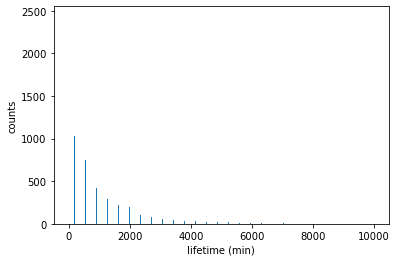

In [44]:
# Lifetimes of tracked clouds:
fig_lifetime,ax_lifetime=plt.subplots()
tobac.plot_lifetime_histogram_bar(Track,axes=ax_lifetime,bin_edges=np.arange(0,10000,20),density=False,width_bar=10)
ax_lifetime.set_xlabel('lifetime (min)')
ax_lifetime.set_ylabel('counts')
plt.show()

In [45]:
lines = inspect.getsource(tobac.plot_lifetime_histogram_bar)
print(lines)

def plot_lifetime_histogram_bar(
    track,
    axes=None,
    bin_edges=np.arange(0, 200, 20),
    density=False,
    width_bar=1,
    shift=0.5,
    **kwargs
):
    hist, bin_edges, bin_centers = lifetime_histogram(
        track, bin_edges=bin_edges, density=density
    )
    plot_hist = axes.bar(bin_centers + shift, hist, width=width_bar, **kwargs)
    return plot_hist



In [46]:
lines = inspect.getsource(tobac.lifetime_histogram)
print(lines)

def lifetime_histogram(
    Track, bin_edges=np.arange(0, 200, 20), density=False, return_values=False
):
    Track_cell = Track.groupby("cell")
    minutes = (Track_cell["time_cell"].max() / pd.Timedelta(minutes=1)).values
    hist, bin_edges = np.histogram(minutes, bin_edges, density=density)
    bin_centers = bin_edges[:-1] + 0.5 * np.diff(bin_edges)
    if return_values:
        return hist, bin_edges, bin_centers, minutes
    else:
        return hist, bin_edges, bin_centers



In [47]:
Track_cell = Track.groupby("cell")
minutes = (Track_cell["time_cell"].max() / pd.Timedelta(minutes=1)).values

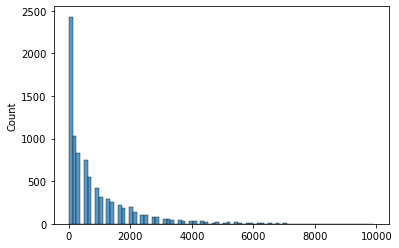

In [48]:
sns.histplot(minutes);